In [220]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import scipy.stats as stats

# Code

0.0275157989359


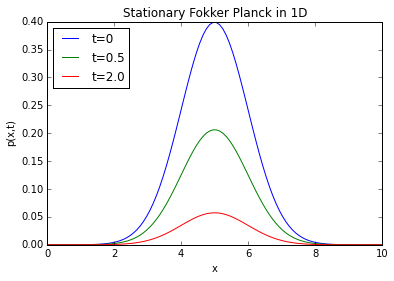

In [838]:
#Stationary Fokker-Planck in 1D
import scipy.stats as stats
D = 0.1
w = 1.0
n = 0.05
sig = 1.0/9.0
m = 100
x = numpy.linspace(0.0, 10.0,  m+ 2)
delta_x = x[1]-x[0]
u_true = lambda x: 0.125*numpy.exp(-2.0*0.53*x / (1.0/9.0))
U = numpy.zeros((m+2,m+2))
#Initial Condition
r  = stats.norm(5.0)
u_0 = r.pdf(numpy.array(x))


U[0,:] = u_0
iterations = 250

for k in range(100):
    for i in range(1,m+1):
        U[i,:] = 0.53*(U[i+1,:] + U[i-1,:]) - delta_x*1.0/18.0*(U[i+1,:]-U[i-1,:]) 


plt.plot(x,U[0,:],label="t=0")
plt.title("Stationary Fokker Planck in 1D")
plt.xlabel("x")
plt.ylabel("p(x,t)")
plt.plot(x,U[-5,:],label="t=0.5")
plt.plot(x,U[-2,:],label="t=2.0" )
plt.legend(loc=2)
error = numpy.linalg.norm(delta_x*(U[-2,:] - u_true(x)))
print error


0.106382978723
0.00565866908103


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.1
0.005
Error is 0.0111085387902


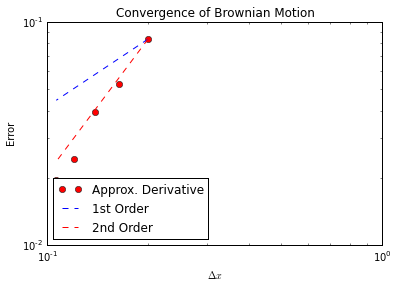

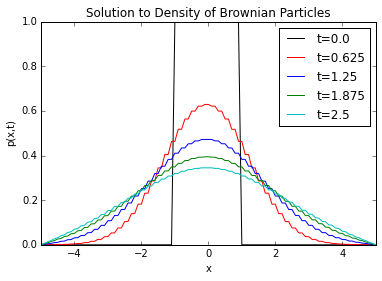

In [836]:
# Compute Heat Equation Solution using Forward Euler and 2nd-order Centered Approximations for Brownian Motion
# Spatial discretization
x = numpy.linspace(-5.0, 5.0, m)
delta_x = x[1] - x[0]
D = 0.5
# Time discretization
delta_t = 0.5 * delta_x**2
N = 501
print delta_x
print delta_t
t = numpy.arange(0.0, N * delta_t, delta_t)
# Solution array
U = numpy.empty((N + 1, m))
# Initial  conditions
U[0,:] = x
U[0,:] = 0.0
U[0,40:60] = 1.0
u_true = lambda x,t: 2.0 / numpy.sqrt(4*numpy.pi*t) * numpy.exp(-x**2/(4.0*t))

dx = []
error = []
# Time stepping loop
for m in range(51,99,11):
    a = round((m-1)*4.0/10.0)
    b = round((m-1)*6.0/10.0)
    U = numpy.empty((N+1,m))
    U[0,:] = 0
    U[0,a:b] = 1
    x = numpy.linspace(-5.0,5.0,m)
    delta_x = x[1] - x[0]
    dx.append(delta_x)
    delta_t = 0.5*delta_x**2
    t = numpy.arange(0.0, N * delta_t, delta_t)
    for n in xrange(len(t)):
        for i in xrange(1,len(x) - 1):
            U[n+1, i] = U[n, i] + delta_t / delta_x**2 * (U[n, i-1] - 2.0 * U[n, i] + U[n, i+1])  
        U[n+1, 0] = 0
        U[n+1, -1] = 0
    error.append(numpy.linalg.norm(delta_x*(U[-1,:]-u_true(x,t[-1]))))
    
    
    
    
error = numpy.array(error)
dx = numpy.array(dx)

fig = plt.figure(2)
axes = fig.add_subplot(1, 1, 1)
axes.loglog(dx, error, "ro", label="Approx. Derivative")
order_C = lambda dx, error, order: numpy.exp(numpy.log(error) - order * numpy.log(dx))
axes.loglog(dx, order_C(dx[0], error[0], 1.0) * dx**1.0, 'b--', label="1st Order")
axes.loglog(dx, order_C(dx[0], error[0], 2.0) * dx**2.0, 'r--', label="2nd Order")
axes.legend(loc=3)
axes.set_title("Convergence of Brownian Motion")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("Error")  

m = 101
x = numpy.linspace(-5.0, 5.0, m)
delta_x = x[1] - x[0]
D = 0.5
# Time discretization
delta_t = 0.5 * delta_x**2
N = 501
print delta_x
print delta_t
t = numpy.arange(0.0, N * delta_t, delta_t)
# Solution array
U = numpy.empty((N + 1, m))
# Initial  conditions
U[0,:] = x
U[0,:] = 0.0
U[0,40:60] = 1.0


for n in xrange(len(t)):
    for i in xrange(1,len(x) - 1):
        U[n+1, i] = U[n, i] + delta_t / delta_x**2 * (U[n, i-1] - 2.0 * U[n, i] + U[n, i+1])  
    U[n+1, 0] = 0
    U[n+1, -1] = 0

error = numpy.linalg.norm(delta_x*(U[-1,:] - u_true(x,t[-1])))
print "Error is %s"%error
# Plot a few solutions
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for (i, n) in enumerate((0, 125, 250, 375, 500)):
    axes.plot(x, U[n, :], colors[i], label='t=%s' % numpy.round(t[n], 4))
    axes.set_xlabel("x")
    axes.set_ylabel("p(x,t)")
    axes.set_title("Solution to Density of Brownian Particles ")
    axes.set_xlim([-5.0,5.0])
    axes.set_ylim([0.0, 1.0])
axes.legend()
plt.show()



0.2
0.032


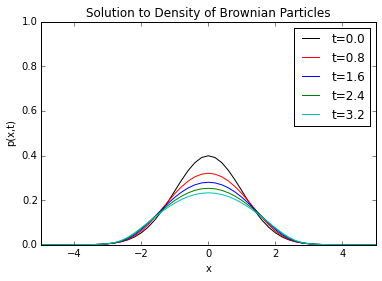

Error is 0.169559139593


In [795]:
#Solution to Fokker-Planck using Forward Time Centered Space Difference with 0 Drift or Solution to Brownian Motion

# Spatial discretization
m = 101
x = numpy.linspace(-10.0, 10.0, m)
delta_x = x[1]-x[0]
# Time discretization
delta_t = 0.8 * delta_x**2
N = 101
t = numpy.arange(0.0, N * delta_t, delta_t)
print delta_x
print delta_t
# Solution array
U = numpy.empty((N + 1, m))
r  = stats.norm(0)
u_0 = r.pdf(numpy.array(x))
# Initial and boundary conditions
U[0,:] = u_0


# Time stepping loop
for n in xrange(len(t)):
    for i in xrange(1,len(x) - 1):
        U[n+1, i] = U[n, i] + U[n, i]*delta_t / delta_x**2 * (U[n, i-1] - 2.0 * U[n, i] + U[n, i+1]) 
    U[n+1, 0] = 0
    U[n+1, -1] = 0

# Plot a few solutions
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for (i, n) in enumerate((0, 25, 50, 75, 100)):
    axes.plot(x, U[n, :], colors[i], label='t=%s' % numpy.round(t[n], 4))
    axes.set_xlabel("x")
    axes.set_ylabel("p(x,t)")
    axes.set_title("Solution to Density of Brownian Particles ")
    axes.set_xlim([-5.0,5.0])
    axes.set_ylim([0.0, 1.0])
axes.legend()
plt.show()





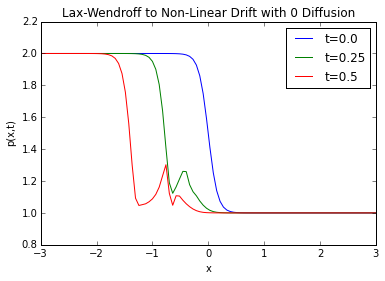

In [633]:
#Solution to Lax-Wendroff applied to Non-Linear Drift with 0 Diffusion

# Spatial discretization
m = 100
a = 12
x = numpy.linspace(-3.0, 3.0, m)
delta_x = x[1]-x[0]
# Time discretization
delta_t = 0.8*delta_x

# Solution array
U = numpy.empty((N + 1, m))
u = lambda x: 1.0 + numpy.exp(-a*x) / (1 + numpy.exp(-a*x))
u_0 = 1.0 + numpy.exp(-a*x) / (1 + numpy.exp(-a*x))
# Initial and boundary conditions
U = u_0
plt.plot(x,u_0,label="t=0.0")

# Time stepping loop
t_final = 0.25
U_new = numpy.empty(U.shape)
t = 0.0

for t_final in [0.25,0.5]:
    U_new = numpy.empty(U.shape)
    while t < t_final:
        U_new[0] = 2.0
        b = (1.0-2.0*U[1:-1])
        U_new[1:-1] = U[1:-1] - b*delta_t / (2.0 * delta_x) * (U[2:] - U[:-2]) \
                                + (b**2*delta_t**2) / (2.0 * delta_x**2) * (U[2:] - 2.0 * U[1:-1] + U[:-2])
        U_new[-1] = 1.0
        U = U_new.copy()
        t += delta_t
    plt.plot(x,U,label = "t=%s" %t_final)
    plt.legend(loc=1)
    plt.title("Lax-Wendroff to Non-Linear Drift with 0 Diffusion")
    plt.xlabel("x")
    plt.ylabel("p(x,t)")
#    fig = plt.figure()
#    axes = fig.add_subplot(1, 1, 1)
#    axes.plot(x,U)


    
    
    
    
    
    
    
    
    





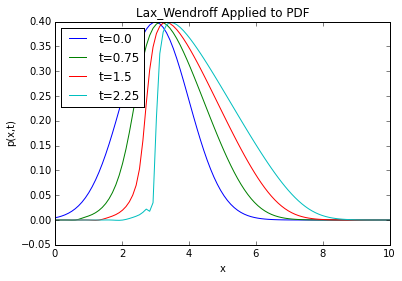

In [765]:
#Solution to Lax-Wendroff applied to Non-Linear Drift with 0 Diffusion but with PDF

# Spatial discretization
m = 100
a = 12
x = numpy.linspace(0.0, 10.0, m)
delta_x = x[1]-x[0]
# Time discretization
delta_t = 0.8*delta_x

# Solution array
U = numpy.empty((N + 1, m))
rv = stats.norm(3.0)
u = rv.pdf(numpy.array(x))
u_0 = u
# Initial and boundary conditions
U = u_0
plt.plot(x,u_0,label="t=0.0")

# Time stepping loop
U_new = numpy.empty(U.shape)
t = 0.0

for t_final in [0.75,1.5,2.25]:
    U_new = numpy.empty(U.shape)
    while t < t_final:
        U_new[0] = 0.0
        b = (1.0-2.0*U[1:-1])
        U_new[1:-1] = U[1:-1] - b*delta_t / (2.0 * delta_x) * (U[2:] - U[:-2]) \
                                + (b**2*delta_t**2) / (2.0 * delta_x**2) * (U[2:] - 2.0 * U[1:-1] + U[:-2])
        U_new[-1] = 0.0
        U = U_new.copy()
        t += delta_t
    plt.plot(x,U,label="t=%s"%t_final)
    plt.legend(loc=2)
    plt.title("Lax_Wendroff Applied to PDF")
    plt.xlabel("x")
    plt.ylabel("p(x,t)")
#    fig = plt.figure()
#    axes = fig.add_subplot(1, 1, 1)
#   axes.plot(x,U)


    
    
    
    
    
    
    
    
    






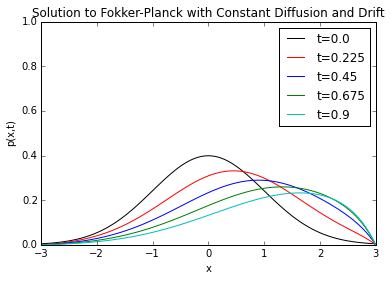

In [839]:
# Solution to Fokker-Planck with Constant Diffusion and Drift 
# Spatial discretization
m = 101
x = numpy.linspace(-3.0, 3.0, m)
delta_x = x[1] - x[0]
D = 0.5
# Time discretization
delta_t = 0.5 * delta_x**2
N = 501
t = numpy.arange(0.0, N * delta_t, delta_t)

# Solution array
U = numpy.empty((N + 1, m))
r  = stats.norm(0)
u_0 = r.pdf(numpy.array(x))
# Initial  conditions
U[0,:] = u_0

 
# Time stepping loop
for n in xrange(len(t)):
    for i in xrange(1,len(x) - 1):
        U[n+1, i] = (U[n, i] + delta_t / delta_x**2 * (U[n, i-1] - 2.0 * U[n, i] + U[n, i+1]) - \
                     delta_t / delta_x *(U[n,i+1]-U[n,i-1]))
    U[n+1, 0] = 0
    U[n+1, -1] = 0

# Plot a few solutions
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for (i, n) in enumerate((0, 125, 250, 375, 500)):
    axes.plot(x, U[n, :], colors[i], label='t=%s' % numpy.round(t[n], 4))
    axes.set_xlabel("x")
    axes.set_ylabel("p(x,t)")
    axes.set_title("Solution to Fokker-Planck with Constant Diffusion and Drift ")
    axes.set_xlim([-3.0,3.0])
    axes.set_ylim([0.0, 1.0])
axes.legend()
plt.show()




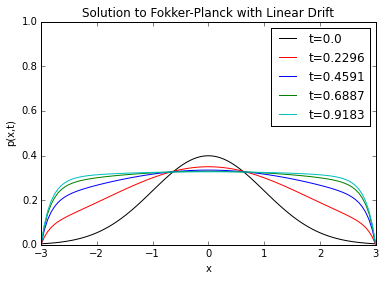

In [771]:
# Solution to Fokker-Planck with Linear Drift and Constant Diffusion 
# Spatial discretization
m = 100
x = numpy.linspace(-3.0, 3.0, m)
delta_x = x[1] - x[0]
D = 0.5
A = lambda x: x
# Time discretization
delta_t = 0.5 * delta_x**2
N = 501
t = numpy.arange(0.0, N * delta_t, delta_t)

# Solution array
U = numpy.empty((N + 1, m))
r  = stats.norm(0)
u_0 = r.pdf(numpy.array(x))
# Initial  conditions
U[0,:] = u_0

 
# Time stepping loop
for n in xrange(len(t)):
    for i in xrange(1,len(x) - 1):
        U[n+1, i] = (U[n, i] + delta_t / delta_x**2 * (U[n, i-1] - 2.0 * U[n, i] + U[n, i+1]) - \
                     A(x[i])*delta_t / delta_x *(U[n,i+1]-U[n,i-1]))
    U[n+1, 0] = 0
    U[n+1, -1] = 0

# Plot a few solutions
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for (i, n) in enumerate((0, 125, 250, 375, 500)):
    axes.plot(x, U[n, :], colors[i], label='t=%s' % numpy.round(t[n], 4))
    axes.set_xlabel("x")
    axes.set_ylabel("p(x,t)")
    axes.set_title("Solution to Fokker-Planck with Linear Drift ")
    axes.set_xlim([-3.0,3.0])
    axes.set_ylim([0.0, 1.0])
axes.legend()
plt.show()



